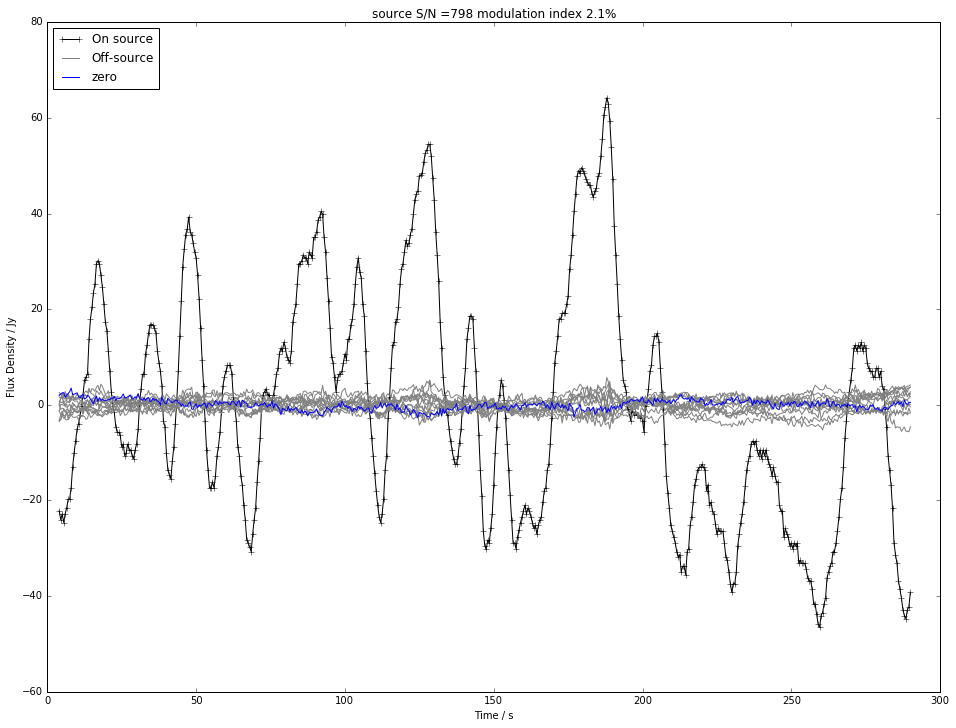

In [12]:
#%matplotlib
fig = plt.figure(figsize=(16, 12))
plt.plot(t, on-np.mean(on), '+-', color='black', label='On source')
for i in range(len(edges)):
    plt.plot(t, edges[i]-np.mean(edges[i]), color='grey', label='Off-source' if i==0 else None)
plt.plot(t, zero-np.mean(zero), color='blue', label='zero')
plt.title("source S/N =%.0f modulation index %.1f%%" % ((signal/noise), 100*mod_index))
plt.ylabel("Flux Density / Jy")
plt.xlabel("Time / s")
plt.legend(loc='upper left')

In [13]:
from scipy.signal import hann, welch

In [14]:
print on.shape
f, ps_on = welch(on, fs=2., window='hanning', nperseg=32, detrend='constant')
_, ps_zero = welch(zero, fs=2., window='hanning', nperseg=32, detrend='constant')
ps_edges = np.zeros((len(edge_xs), len(f)))

for i in range(len(edge_xs)):
    ps_edges[i] = welch(edges[i], fs=2., window='hanning', nperseg=32, detrend='constant')[1]
    

(573,)


In [15]:
# check normalisation
print np.std(on)
print np.sqrt(np.mean(ps_on))
print np.sqrt(np.mean(ps_on[4:]))
print np.sqrt(ps_on[-2])

print
print np.std(zero)
print np.sqrt(np.mean(ps_zero))
print np.sqrt(np.mean(ps_zero[4:]))
print np.sqrt(ps_zero[-2])
print
off_noise_level = np.mean(ps_edges[:, 4:])
on_noise_level = np.mean(ps_on[4:])

24.37436224390496
12.037000811104166
1.0290175077406871
0.7828648157229774

1.016812997533566
0.5104166704269041
0.4384596270273531
0.4320244538151848



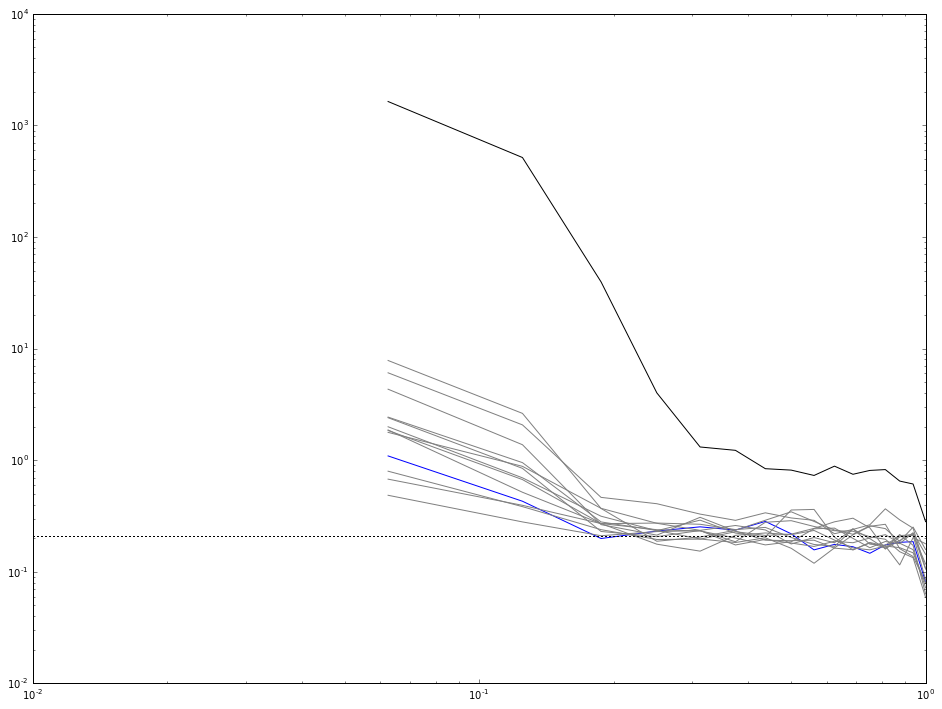

In [16]:
fig = plt.figure(figsize=(16, 12))
plt.loglog(f, ps_on, color='black', label='On source')
plt.loglog(f, ps_zero, color='blue', label='zero')
for i in range(len(edges)):
    plt.plot(f, ps_edges[i], color='grey')
    plt.axhline(off_noise_level, linestyle=':', color='black')
    # plt.axhline(on_noise_level, linestyle='--', color='black')
plt.show()

Try a higher-resolution power spectrum

In [17]:
from scipy.signal import convolve
from scipy.signal.windows import triang

print len(on)
print 573/3


f, ps_on = welch(on, fs=2., window='hanning', nperseg=len(on)/3, detrend='constant')
_, ps_zero = welch(zero, fs=2., window='hanning', nperseg=len(on)/3, detrend='constant')

ps_edges = np.zeros((len(edge_xs), len(f)))

for i in range(len(edge_xs)):
    ps_edges[i] = welch(edges[i], fs=2., window='hanning', nperseg=len(on)/3, detrend='constant')[1]


573
191


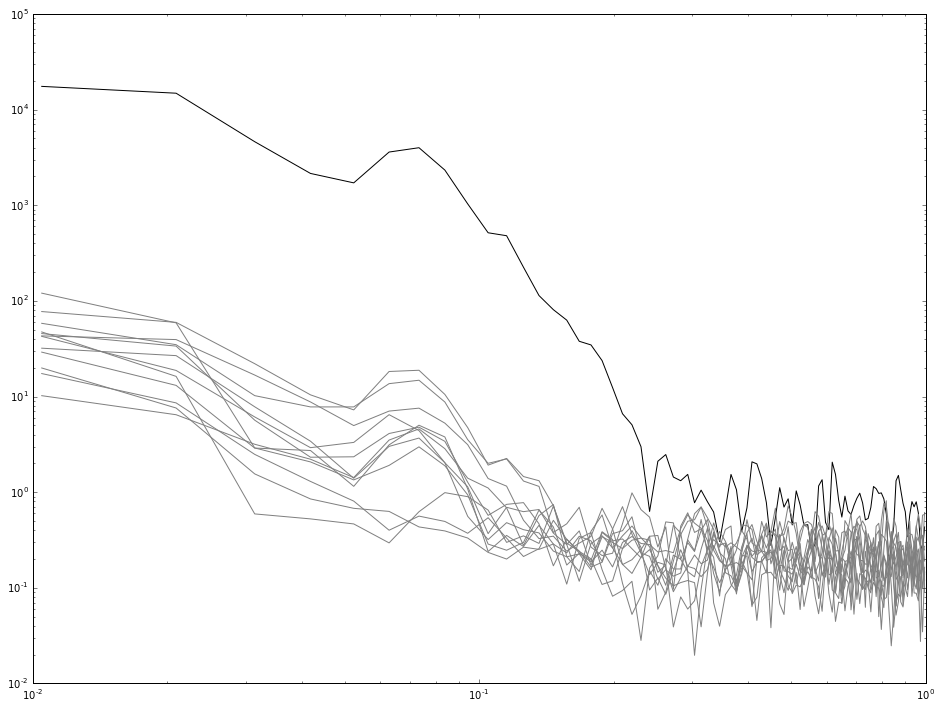

In [18]:
fig = plt.figure(figsize=(16, 12))
plt.loglog(f, ps_on, color='black', label='On source')
for i in range(len(edges)):
    plt.plot(f, ps_edges[i], color='grey')
plt.show()

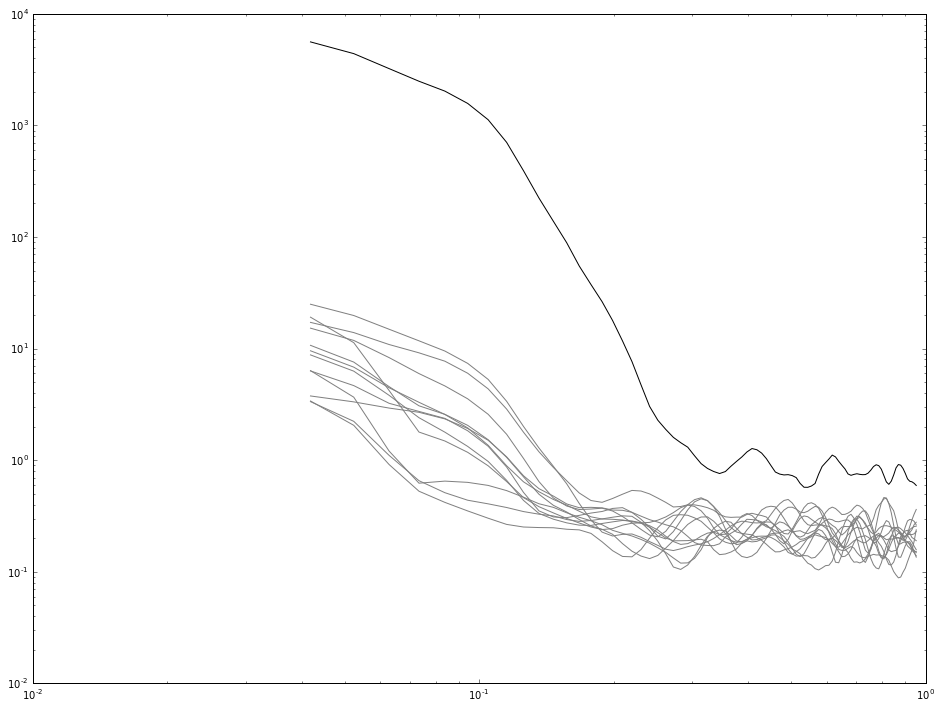

In [19]:
def conv_triang(f1, n=9):
    t = triang(n)
    return convolve(f1, t, mode='valid')/np.sum(t)

fig = plt.figure(figsize=(16, 12))
f_conv = conv_triang(f)
plt.loglog(f_conv, conv_triang(ps_on), color='black', label='On source')
for i in range(len(edges)):
    plt.plot(f_conv, conv_triang(ps_edges[i]), color='grey')
plt.show()